<a href="https://colab.research.google.com/github/vinaytaywade/Daily_Tasks/blob/main/Temperature_prediction_using_ARIMA_(Time_Series).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
global_temp=pd.read_csv(r'F:\Time_series_Analysis\2. Global_Warming\Dataset/GlobalTemperatures.csv')

In [ ]:
global_temp.head(3)

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
0,1750-01-01,3.034,3.574,NaN,NaN,NaN,NaN,NaN,NaN
1,1750-02-01,3.083,3.702,NaN,NaN,NaN,NaN,NaN,NaN
2,1750-03-01,5.626,3.076,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
global_temp.duplicated().sum()



0

In [ ]:
global_temp.dtypes

dt                                            object
LandAverageTemperature                       float64
LandAverageTemperatureUncertainty            float64
LandMaxTemperature                           float64
LandMaxTemperatureUncertainty                float64
LandMinTemperature                           float64
LandMinTemperatureUncertainty                float64
LandAndOceanAverageTemperature               float64
LandAndOceanAverageTemperatureUncertainty    float64
dtype: object

In [ ]:
global_temp['dt'][0]

'1750-01-01'

In [ ]:
global_temp['dt']=pd.to_datetime(global_temp['dt'])

In [ ]:
global_temp['dt'].dtype

dtype('<M8[ns]')

In [ ]:
global_temp['dt'][0]

Timestamp('1750-01-01 00:00:00')

In [ ]:
global_temp['years']=global_temp['dt'].dt.year

In [ ]:
global_temp.head(2)

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty,years
0,1750-01-01,3.034,3.574,NaN,NaN,NaN,NaN,NaN,NaN,1750
1,1750-02-01,3.083,3.702,NaN,NaN,NaN,NaN,NaN,NaN,1750


In [ ]:

data=global_temp.groupby('years').agg({'LandAverageTemperature':'mean','LandAverageTemperatureUncertainty':'mean'}).reset_index()

In [ ]:
data

,years,LandAverageTemperature,LandAverageTemperatureUncertainty
0,1750,8.719364,2.637818
1,1751,7.976143,2.781143
2,1752,5.779833,2.977000
3,1753,8.388083,3.176000
4,1754,8.469333,3.494250
...,...,...,...
261,2011,9.516000,0.082000
262,2012,9.507333,0.083417
263,2013,9.606500,0.097667
264,2014,9.570667,0.090167


In [ ]:
data.columns

Index(['years', 'LandAverageTemperature', 'LandAverageTemperatureUncertainty'], dtype='object')

    Maximum Uncertainty will be Avg temperature  +   deviation(Uncertainty)

    whereas minimum Uncertainty will be Avg temp -   deviation(Uncertainty)

    and this deviation is exactly your Uncertainty...

In [ ]:


data['Uncertainty_top']=data['LandAverageTemperature'] + data['LandAverageTemperatureUncertainty']
data['Uncertainty_bottom']=data['LandAverageTemperature'] - data['LandAverageTemperatureUncertainty']

In [ ]:
data.head(2)

,years,LandAverageTemperature,LandAverageTemperatureUncertainty,Uncertainty_top,Uncertainty_bottom
0,1750,8.719364,2.637818,11.357182,6.081545
1,1751,7.976143,2.781143,10.757286,5.195000


In [ ]:
data.columns

Index(['years', 'LandAverageTemperature', 'LandAverageTemperatureUncertainty',
       'Uncertainty_top', 'Uncertainty_bottom'],
      dtype='object')

<AxesSubplot:xlabel='years'>

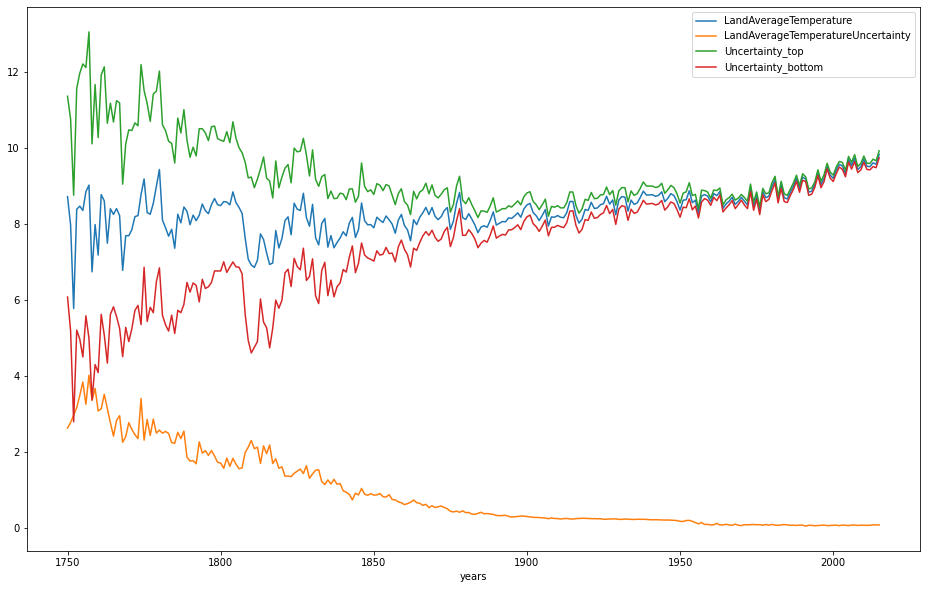

In [ ]:

data.plot(x='years',y=['LandAverageTemperature', 'LandAverageTemperatureUncertainty',
       'Uncertainty_top', 'Uncertainty_bottom'],figsize=(16,10))

In [ ]:
global_temp.columns

Index(['dt', 'LandAverageTemperature', 'LandAverageTemperatureUncertainty',
       'LandMaxTemperature', 'LandMaxTemperatureUncertainty',
       'LandMinTemperature', 'LandMinTemperatureUncertainty',
       'LandAndOceanAverageTemperature',
       'LandAndOceanAverageTemperatureUncertainty', 'years'],
      dtype='object')

In [ ]:
 global_temp['month']=global_temp['dt'].dt.month

In [ ]:
global_temp.head(2)

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty,years,month
0,1750-01-01,3.034,3.574,NaN,NaN,NaN,NaN,NaN,NaN,1750,1
1,1750-02-01,3.083,3.702,NaN,NaN,NaN,NaN,NaN,NaN,1750,2


In [ ]:
global_temp['month'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12], dtype=int64)

In [ ]:
def get_season(month):

    if month>=3 and month<=5:
        return 'spring'

    elif month>=6 and month<=8:
        return 'summer'

    elif month>=9 and month<=11:
        return 'autumn'

    else:
        return 'winter'

In [ ]:

global_temp['season']=global_temp['month'].apply(get_season)

In [ ]:
global_temp.columns

Index(['dt', 'LandAverageTemperature', 'LandAverageTemperatureUncertainty',
       'LandMaxTemperature', 'LandMaxTemperatureUncertainty',
       'LandMinTemperature', 'LandMinTemperatureUncertainty',
       'LandAndOceanAverageTemperature',
       'LandAndOceanAverageTemperatureUncertainty', 'years', 'month',
       'season'],
      dtype='object')

In [ ]:
years=global_temp['years'].unique()

In [ ]:
global_temp['season'].unique()

array(['winter', 'spring', 'summer', 'autumn'], dtype=object)

In [ ]:

spring_temps=[]
summer_temps=[]
autumn_temps=[]
winter_temps=[]

for year in years:
    current_yr=global_temp[global_temp['years']==year]

    spring_temps.append(current_yr[current_yr['season']=='spring']['LandAverageTemperature'].mean())
    summer_temps.append(current_yr[current_yr['season']=='summer']['LandAverageTemperature'].mean())
    autumn_temps.append(current_yr[current_yr['season']=='autumn']['LandAverageTemperature'].mean())
    winter_temps.append(current_yr[current_yr['season']=='winter']['LandAverageTemperature'].mean())


In [ ]:
 season=pd.DataFrame()

In [ ]:
season['years']=years
season['spring_temps']=spring_temps
season['summer_temps']=summer_temps
season['autumn_temps']=autumn_temps
season['winter_temps']=winter_temps

In [ ]:
season

,years,spring_temps,summer_temps,autumn_temps,winter_temps
0,1750,8.563000,14.518333,8.890000,2.963000
1,1751,6.735000,14.116000,10.673000,1.729000
2,1752,7.035500,NaN,7.587000,2.717000
3,1753,8.627333,14.608333,9.212333,1.104333
4,1754,9.074333,14.208333,8.957333,1.637333
...,...,...,...,...,...
261,2011,9.190000,14.954667,10.026000,3.893333
262,2012,9.429667,14.762667,10.208000,3.629000
263,2013,9.166667,14.771000,10.278000,4.210333
264,2014,9.516333,14.694333,10.044667,4.027333


In [ ]:
##data.plot(x='years',y=['LandAverageTemperature', 'LandAverageTemperatureUncertainty',
 ##      'Uncertainty_top', 'Uncertainty_bottom'],figsize=(16,10))

In [ ]:
season.columns

Index(['years', 'spring_temps', 'summer_temps', 'autumn_temps',
       'winter_temps'],
      dtype='object')

In [ ]:
season[['spring_temps', 'summer_temps', 'autumn_temps',
       'winter_temps']]

,spring_temps,summer_temps,autumn_temps,winter_temps
0,8.563000,14.518333,8.890000,2.963000
1,6.735000,14.116000,10.673000,1.729000
2,7.035500,NaN,7.587000,2.717000
3,8.627333,14.608333,9.212333,1.104333
4,9.074333,14.208333,8.957333,1.637333
...,...,...,...,...
261,9.190000,14.954667,10.026000,3.893333
262,9.429667,14.762667,10.208000,3.629000
263,9.166667,14.771000,10.278000,4.210333
264,9.516333,14.694333,10.044667,4.027333


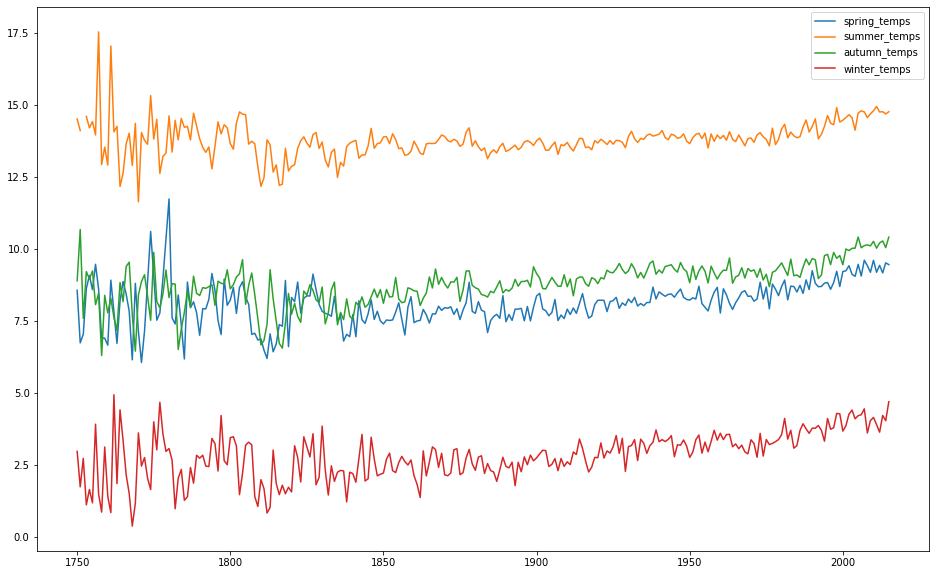

In [ ]:
plt.figure(figsize=(16,10))
plt.plot(season['years'],season[['spring_temps', 'summer_temps', 'autumn_temps',
       'winter_temps']])

plt.legend(['spring_temps', 'summer_temps', 'autumn_temps',
       'winter_temps'])

In [ ]:

cities=pd.read_csv(r'F:\Time_series_Analysis\2. Global_Warming\Dataset/GlobalLandTemperaturesByCity.csv')

In [ ]:
cities.shape

(8599212, 7)

In [ ]:

cities['Country'].unique()

array(['Denmark', 'Turkey', 'Kazakhstan', 'China', 'Spain', 'Germany',
       'Nigeria', 'Iran', 'Russia', 'Canada', "Côte D'Ivoire",
       'United Kingdom', 'Saudi Arabia', 'Japan', 'United States',
       'India', 'Benin', 'United Arab Emirates', 'Mexico', 'Venezuela',
       'Ghana', 'Ethiopia', 'Australia', 'Yemen', 'Indonesia', 'Morocco',
       'Pakistan', 'France', 'Libya', 'Burma', 'Brazil', 'South Africa',
       'Syria', 'Egypt', 'Algeria', 'Netherlands', 'Malaysia', 'Portugal',
       'Ecuador', 'Italy', 'Uzbekistan', 'Philippines', 'Madagascar',
       'Chile', 'Belgium', 'El Salvador', 'Romania', 'Peru', 'Colombia',
       'Tanzania', 'Tunisia', 'Turkmenistan', 'Israel', 'Eritrea',
       'Paraguay', 'Greece', 'New Zealand', 'Vietnam', 'Cameroon', 'Iraq',
       'Afghanistan', 'Argentina', 'Azerbaijan', 'Moldova', 'Mali',
       'Congo (Democratic Republic Of The)', 'Thailand',
       'Central African Republic', 'Bosnia And Herzegovina', 'Bangladesh',
       'Switzerland'

In [ ]:

usa=cities[cities['Country']=='United States']

In [ ]:
usa.columns

Index(['dt', 'AverageTemperature', 'AverageTemperatureUncertainty', 'City',
       'Country', 'Latitude', 'Longitude'],
      dtype='object')

In [ ]:

usa['City'].unique()

array(['Abilene', 'Akron', 'Albuquerque', 'Alexandria', 'Allentown',
       'Amarillo', 'Anaheim', 'Anchorage', 'Ann Arbor', 'Antioch',
       'Arlington', 'Arvada', 'Atlanta', 'Aurora', 'Austin',
       'Bakersfield', 'Baltimore', 'Baton Rouge', 'Beaumont', 'Bellevue',
       'Berkeley', 'Birmingham', 'Boston', 'Bridgeport', 'Brownsville',
       'Buffalo', 'Burbank', 'Cambridge', 'Cape Coral', 'Carrollton',
       'Cary', 'Cedar Rapids', 'Chandler', 'Charleston', 'Charlotte',
       'Chattanooga', 'Chesapeake', 'Chicago', 'Chula Vista',
       'Cincinnati', 'Clarksville', 'Clearwater', 'Cleveland',
       'Colorado Springs', 'Columbia', 'Columbus', 'Concord',
       'Coral Springs', 'Corona', 'Corpus Christi', 'Costa Mesa',
       'Dallas', 'Dayton', 'Denton', 'Denver', 'Des Moines', 'Detroit',
       'Downey', 'Durham', 'East Los Angeles', 'Edison', 'El Monte',
       'El Paso', 'Elizabeth', 'Escondido', 'Eugene', 'Evansville',
       'Fairfield', 'Fayetteville', 'Flint', 'Fontana',

In [ ]:

usa_cities=['New York','Los Angeles','San Francisco']

In [ ]:
data2=usa[usa['City'].isin(usa_cities)]

In [ ]:
data2.shape

(7193, 7)

In [ ]:
data2.head(3)

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
4356748,1849-01-01,8.819,2.558,Los Angeles,United States,34.56N,118.70W
4356749,1849-02-01,9.577,1.970,Los Angeles,United States,34.56N,118.70W
4356750,1849-03-01,11.814,2.173,Los Angeles,United States,34.56N,118.70W


In [ ]:
data2=data2[['dt','AverageTemperature']]

In [ ]:
data2.head(2)

,dt,AverageTemperature
4356748,1849-01-01,8.819
4356749,1849-02-01,9.577


In [ ]:

data2.columns=['Date','Temp']

In [ ]:
data2

,Date,Temp
4356748,1849-01-01,8.819
4356749,1849-02-01,9.577
4356750,1849-03-01,11.814
4356751,1849-04-01,13.704
4356752,1849-05-01,14.834
...,...,...
6637248,2013-05-01,17.434
6637249,2013-06-01,19.759
6637250,2013-07-01,20.657
6637251,2013-08-01,19.731


In [ ]:
data2.dtypes

Date     object
Temp    float64
dtype: object

In [ ]:

data2['Date']=pd.to_datetime(data2['Date'])

In [ ]:
data2.dtypes

Date    datetime64[ns]
Temp           float64
dtype: object

In [ ]:
data2.isnull().sum()

Date      0
Temp    120
dtype: int64

In [ ]:
data2.dropna(inplace=True)

In [ ]:
data2.head(3)

,Date,Temp
4356748,1849-01-01,8.819
4356749,1849-02-01,9.577
4356750,1849-03-01,11.814


In [ ]:
data2.set_index('Date',inplace=True)

In [ ]:
data2.head(4)

,Temp
Date,
1849-01-01,8.819
1849-02-01,9.577
1849-03-01,11.814
1849-04-01,13.704


In [ ]:
data2['year']=data2.index.year

In [ ]:
data2['month']=data2.index.month

In [ ]:
data2.head(3)

,Temp,year,month
Date,,,
1849-01-01,8.819,1849,1
1849-02-01,9.577,1849,2
1849-03-01,11.814,1849,3


In [ ]:
pivot=data2.pivot_table(values='Temp',index='month',columns='year')

In [ ]:
pivot

year,1743,1744,1745,1750,1751,1752,1753,1754,1755,1756,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
month,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,-2.363,-4.310,-3.591,-7.588,-3.122,-2.252,-3.193,-1.985,...,4.080333,4.923000,7.135333,5.656000,5.216333,5.550333,5.776667,5.109333,7.177667,5.388333
2,NaN,NaN,-2.671,-2.719,-2.051,NaN,-1.467,-2.583,-1.802,0.259,...,6.100000,7.297000,7.547667,5.634000,6.754333,6.540667,6.788000,5.777333,7.970000,6.222667
3,NaN,NaN,1.363,2.773,3.256,3.322,4.207,2.728,1.112,NaN,...,12.184000,9.124667,7.527333,10.586000,9.733667,9.211000,10.486667,9.115000,10.604333,10.162333
4,NaN,9.788,8.209,8.848,7.992,7.402,8.099,NaN,8.714,NaN,...,13.806333,12.546000,12.051667,12.342000,13.113000,12.744000,12.254000,12.710000,13.075000,13.880000
5,NaN,15.708,NaN,15.411,NaN,NaN,15.330,NaN,15.238,NaN,...,17.817333,15.982333,17.123333,17.150000,15.800333,17.565667,15.856333,15.724000,17.670333,17.335333
6,NaN,21.210,NaN,19.017,20.724,NaN,20.820,20.075,19.964,20.488,...,19.872000,19.775333,21.395333,20.514333,21.474667,18.941667,20.436667,19.305000,19.904333,21.028333
7,NaN,22.207,NaN,24.203,22.668,NaN,22.524,22.503,NaN,22.452,...,22.246333,23.611667,24.655333,22.628333,23.020000,22.247667,22.538667,22.733333,22.654000,23.489667
8,NaN,NaN,NaN,22.135,21.547,NaN,21.324,21.461,NaN,21.208,...,22.101333,23.028333,21.920333,22.690000,22.305333,22.578000,21.665333,22.028667,23.384667,21.654667
9,NaN,14.922,NaN,17.445,15.812,NaN,15.548,16.281,16.137,17.345,...,20.669333,19.427667,19.365333,19.559000,20.686667,20.752667,20.537333,20.856333,20.655667,20.393333


Text(0, 0.5, 'Temperatures')

<Figure size 1440x576 with 0 Axes>

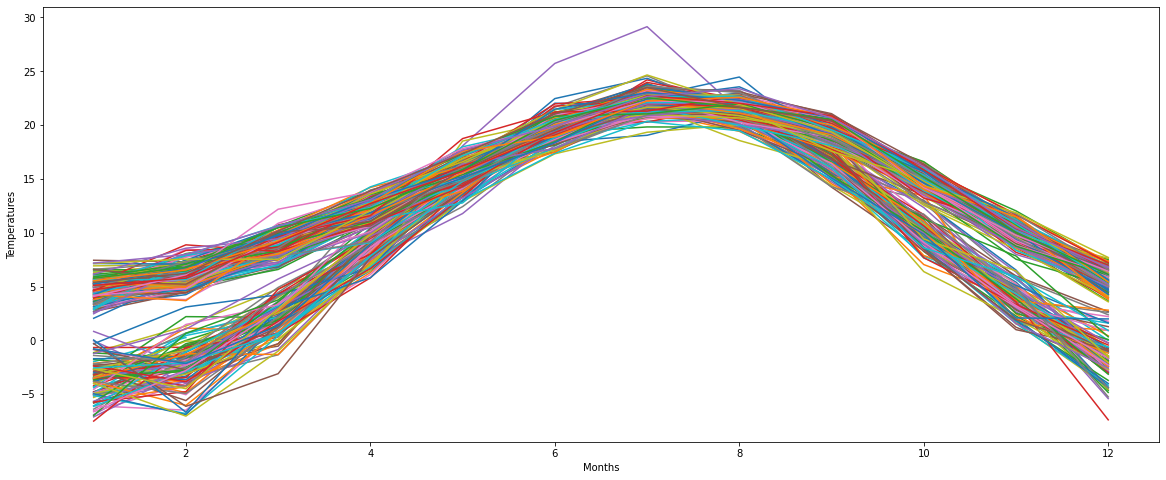

In [ ]:
pivot.plot(figsize=(20,8))
plt.legend().remove()
plt.xlabel('Months')
plt.ylabel('Temperatures')

In [ ]:

from statsmodels.tsa.stattools import adfuller

In [ ]:
adfuller(data2['Temp'])

(-2.0063893036758156,
 0.2837786583333173,
 35,
 7037,
 {'1%': -3.431279613044704,
  '5%': -2.8619508146206374,
  '10%': -2.5669886726127307},
 28011.222669408726)

In [ ]:
def adfuller_test(data):
    result=adfuller(data)

    labels=['ADF Test statistics','p-value','lags_used','nobs']

    for value,label in zip(result,labels):
        print(label + ' : ' + str(value))
    if result[1] <=0.05:
        print('reject the Ho ,data is stationary')
    else:
        print('fail to reject the Ho ,data is not stationary')


In [ ]:
adfuller_test(data2['Temp'])

ADF Test statistics : -2.0063893036758156
p-value : 0.2837786583333173
lags_used : 35
nobs : 7037
fail to reject the Ho ,data is not stationary


In [ ]:
data2['first_temp_diff']=data2['Temp'] - data2['Temp'].shift(12)

In [ ]:
data2.head(13)

,Temp,year,month,first_temp_diff
Date,,,,
1849-01-01,8.819,1849,1,NaN
1849-02-01,9.577,1849,2,NaN
1849-03-01,11.814,1849,3,NaN
1849-04-01,13.704,1849,4,NaN
1849-05-01,14.834,1849,5,NaN
1849-06-01,21.173,1849,6,NaN
1849-07-01,26.159,1849,7,NaN
1849-08-01,26.099,1849,8,NaN
1849-09-01,21.848,1849,9,NaN


In [ ]:

adfuller_test(data2['first_temp_diff'].dropna())

ADF Test statistics : -21.239650404910797
p-value : 0.0
lags_used : 35
nobs : 7025
reject the Ho ,data is stationary


<AxesSubplot:xlabel='Date'>

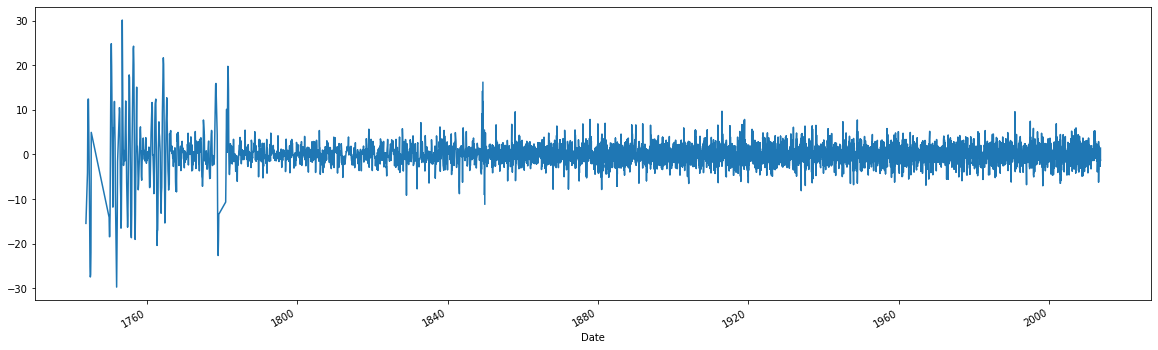

In [ ]:
data2['first_temp_diff'].plot(figsize=(20,6))

In [ ]:
df=data2[['first_temp_diff']]

In [ ]:
df.dropna(inplace=True)

In [ ]:
import warnings
from warnings import filterwarnings
filterwarnings('ignore')

In [ ]:
df.head(10)

,first_temp_diff
Date,
1850-01-01,-1.732
1850-02-01,-1.002
1850-03-01,-1.449
1850-04-01,0.031
1850-05-01,1.799
1850-06-01,-0.932
1850-07-01,-2.714
1850-08-01,-0.164
1850-09-01,0.714


In [ ]:
 df['Predictions']=df['first_temp_diff'].rolling(window=5).mean()

In [ ]:
df.head(2)

,first_temp_diff,Predictions
Date,,
1850-01-01,-1.732,NaN
1850-02-01,-1.002,NaN


In [ ]:
df.dropna(inplace=True)

In [ ]:
df.head(3)

,first_temp_diff,Predictions
Date,,
1850-05-01,1.799,-0.4706
1850-06-01,-0.932,-0.3106
1850-07-01,-2.714,-0.6530


In [ ]:
df.columns=['actual_temp','forecast_temp']

In [ ]:
df.head(3)

,actual_temp,forecast_temp
Date,,
1850-05-01,1.799,-0.4706
1850-06-01,-0.932,-0.3106
1850-07-01,-2.714,-0.6530


In [ ]:
 from sklearn.metrics import mean_squared_error

In [ ]:
np.sqrt(mean_squared_error(df['actual_temp'],df['forecast_temp']))

2.3934235122562058

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from statsmodels.graphics.api import qqplot

In [ ]:
df.head(3)

,actual_temp,forecast_temp
Date,,
1850-05-01,1.799,-0.4706
1850-06-01,-0.932,-0.3106
1850-07-01,-2.714,-0.6530


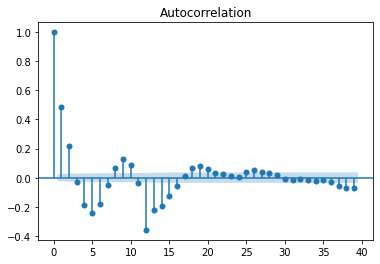

In [ ]:
plot_acf(df['actual_temp'])
plt.show()
## q-3

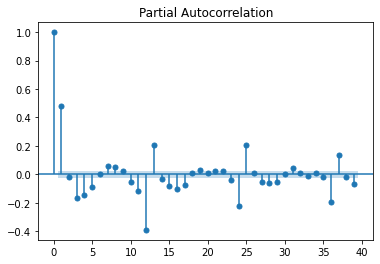

In [ ]:
plot_pacf(df['actual_temp'])
plt.show()

In [ ]:
df.head(3)

,actual_temp,forecast_temp
Date,,
1850-05-01,1.799,-0.4706
1850-06-01,-0.932,-0.3106
1850-07-01,-2.714,-0.6530


In [ ]:
df=df[['actual_temp']]

In [ ]:
df.head(2)

,actual_temp
Date,
1850-05-01,1.799
1850-06-01,-0.932


In [ ]:
df.shape

(7057, 1)

In [ ]:
training_data=df[0:6000]
testing_data=df[6000:]

In [ ]:
from statsmodels.tsa.arima_model import ARIMA

In [ ]:
arima=ARIMA(training_data,order=(2,1,3))

In [ ]:
model=arima.fit()

In [ ]:
pred=model.forecast(steps=len(testing_data))[0]

In [ ]:
pred

array([ 0.4617737 ,  0.22723779, -0.04790332, ...,  0.03678432,
        0.03679384,  0.03680336])

In [ ]:
len(pred)

1057

In [ ]:
len(testing_data)

1057

In [ ]:
np.sqrt(mean_squared_error(testing_data,pred))

1.5133486042397835

In [ ]:

p_values=range(0,4)
d_values=range(0,3)
q_values=range(0,4)


In [ ]:


for p in p_values:
    for d in d_values:
        for q in q_values:
            order=(p,d,q)

            train=df[0:6000]
            test=df[6000:]

            predictions=[]

             for i in range(len(test)):
                try:
                    arima=ARIMA(train,order)


                    model=arima.fit(disp=0)
                    pred_y=model.forecast()[0]
                    predictions.append(pred_y)
                    error=mean_squared_error(test,predictions)
                    print('MSE is {} with order {}'.format(error,order))

                except:
                    continue


MSE is 2.289032977545331 with order (0, 0, 0)
MSE is 2.355544132637986 with order (0, 0, 1)
MSE is 2.3093250623627286 with order (0, 0, 2)
MSE is 2.2925666356964878 with order (0, 0, 3)
MSE is 2.296829600227382 with order (0, 1, 0)
MSE is 2.357423397470939 with order (0, 1, 1)
